# Titanic Survival Prediction
- By Valentine Ezenwanne

## Objective
- To build a system that tells whether a passenger will be saved from sinking

## Dataset description
- Passenger Id: Passenger number
 
- Survival:	0 = No, 1 = Yes

- Pclass: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

- Sex: Gender

- Age: Age in years 	

- SibSp: Number of siblings / spouses aboard the Titanic	

- Parch: Number of parents / children aboard the Titanic	

- Ticket: Ticket number	

- Fare:	Passenger fare	

- Cabin:	Cabin number	

- Embarked	Port of where passenger mounted from	C = Cherbourg, Q = Queenstown, S = Southampton


## Import the libraries

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

### Load the dataset

In [2]:
#load the dataset
df = pd.read_csv('train.csv')

In [3]:
#display few lines
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling

In [4]:
#understanding the shape
df.shape

(891, 12)

- There are 891 passengers in the training set

In [5]:
#check for duplicates
df.duplicated().sum()

0

- There are no duplicates

In [6]:
#check for missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are 177 missing values in age
- There are 687 missing values in Cabin
- There are 2 missing values in Embarked

In [7]:
#check for datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#checking for unique values
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Data Exploration

### Univariate Exploration

#### Distribution of Gender and Survived

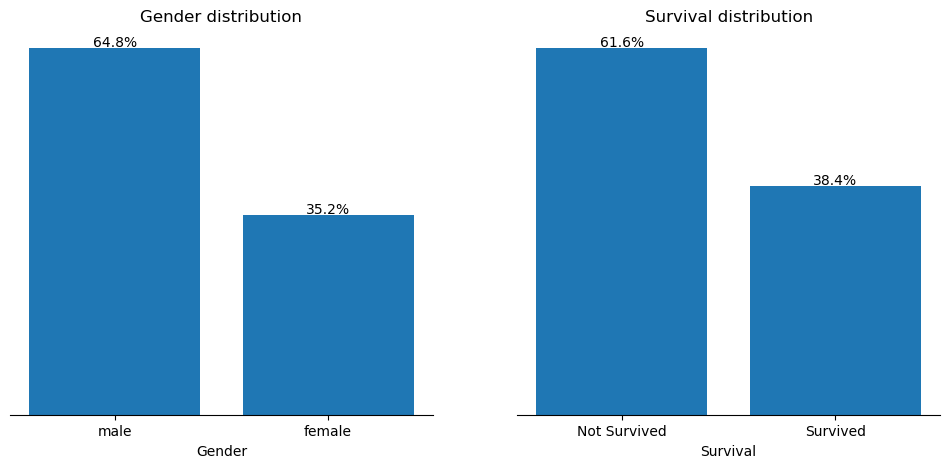

In [14]:
#plotting a bar chart of Gender and Survived

#convert the survived to category and map it to text
survived = df['Survived'].astype('category')
survived = survived.map({0: 'Not Survived', 1: 'Survived'})

fig, ax = plt.subplots(1, 2, figsize=[12,5])
ax[0].bar(x=df['Sex'].value_counts().index, height=df['Sex'].value_counts().values)
ax[1].bar(x=survived.value_counts().index, height=survived.value_counts().values)

#set title
ax[0].set_title('Gender distribution')
ax[1].set_title('Survival distribution')

#set x_label
ax[0].set_xlabel('Gender')
ax[1].set_xlabel('Survival')

#remove spines
ax[0].spines[['top', 'left', 'right']].set_visible(False)
ax[1].spines[['top', 'left', 'right']].set_visible(False)

#remove yaxis
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)

#add annotation
for index, values in enumerate(df['Sex'].value_counts()):
    ax[0].annotate(str(round((values/len(df['Sex']))*100, 1))+'%', xy=(index, values+9), ha='center', va='center')

for index, values in enumerate(df['Survived'].value_counts()):
    ax[1].annotate(str(round((values/len(survived))*100, 1))+'%', xy=(index, values+9), ha='center', va='center')
    
plt.show()

- The titanic had about 65% of male passenger and 35% female passenger
- About 62% of the passengers did not survived whilw 38% survived

#### Age Distribution

In [16]:
#preprocessing age
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)

#round the age and convert to integer
df['Age'] = df['Age'].round(0).astype('int')

In [17]:
#checking the value counts of Age
df['Age'].value_counts()

28    204
24     32
22     27
30     27
18     26
     ... 
0       1
12      1
53      1
66      1
74      1
Name: Age, Length: 71, dtype: int64

In [19]:
#creating a age bucket group

age_buc = []
for a in df['Age'].values:
    if a <=12:
        age_buc.append('Child')
    elif a>12 and a<=18:
        age_buc.append('Teenage')
    elif a>18 and a<25:
        age_buc.append('Young Adult')
    elif a>=25 and a<45:
        age_buc.append('Adult')
    elif a>=45 and a<65:
        age_buc.append('Middle Aged Adult')
    elif a>=65:
        age_buc.append('Elderly')

In [20]:
#creating the column age_group
df['Age_group'] = age_buc

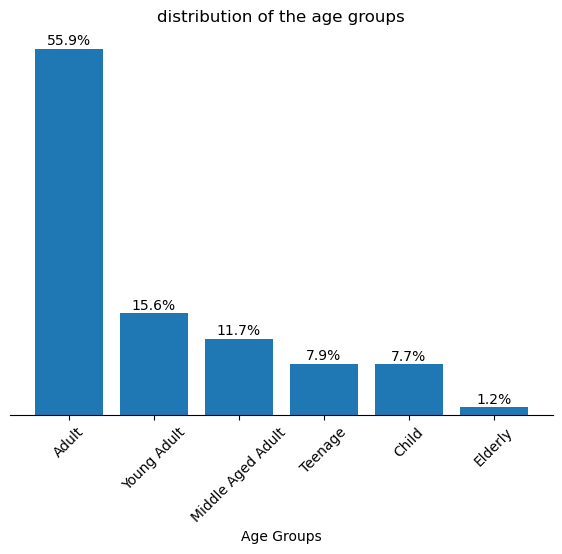

In [21]:
# Plotting the distribution of Age Group

fig, ax = plt.subplots(figsize=[7,5])
ax.bar(x=df['Age_group'].value_counts().index, height=df['Age_group'].value_counts().values)

#add title
ax.set_title('distribution of the age groups')
ax.set_xlabel('Age Groups')
ax.spines[['top', 'right', 'left']].set_visible(False)


#remove yaxis
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(df['Age_group'].value_counts()):
    ax.annotate(str(round((values/len(df['Age_group']))*100, 1))+'%', xy=(index, values+10), ha='center', va='center')


#rotate the ticks
ax.xaxis.set_tick_params(rotation=45)

plt.show()

- About 56% of the passengers were **Adults** i.e. between (25 - 45) years, followed by **young adults**(19 - 24) which is about 16% and **Middle Aged Adult**(45 - 64) which is about 12 %. Other age group were less than 10%

#### Distribution of Embarked and Passenger Class

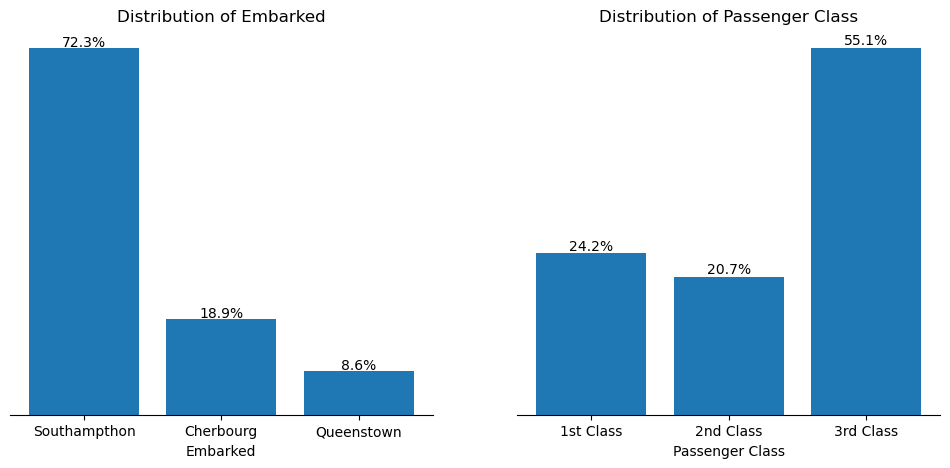

In [22]:
# plotting the distribution of Embarked and Pclass

#mapping the letters in embarked to their name
Embarked = df['Embarked'].map({'S':'Southampthon', 'Q': 'Queenstown', 'C': 'Cherbourg'})

#converting the Pclass to category and mapping it to text
Pclass = df['Pclass'].astype('category')
Pclass = Pclass.map({1: '1st Class', 2: '2nd Class', 3: '3rd Class'})

#plotting the embarked and pclass
fig, ax = plt.subplots(1, 2, figsize=[12,5])
ax[0].bar(x=Embarked.value_counts().index, height=Embarked.value_counts().values)
ax[1].bar(x=Pclass.value_counts().sort_index().index, height=Pclass.value_counts().sort_index().values)

#set title
ax[0].set_title('Distribution of Embarked')
ax[1].set_title('Distribution of Passenger Class')

#set x_label
ax[0].set_xlabel('Embarked')
ax[1].set_xlabel('Passenger Class')

#remove spines
ax[0].spines[['top', 'left', 'right']].set_visible(False)
ax[1].spines[['top', 'left', 'right']].set_visible(False)


#remove yaxis
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)

#add annotation
for index, values in enumerate(Embarked.value_counts()):
    ax[0].annotate(str(round((values/len(Embarked))*100, 1))+'%', xy=(index, values+10), ha='center', va='center')

for index, values in enumerate(Pclass.value_counts().sort_index()):
    ax[1].annotate(str(round((values/len(Pclass))*100, 1))+'%', xy=(index, values+10), ha='center', va='center')


plt.show()

- Majority of the passengers, about 72% boarded the titanic at Southampton
- 55% of the passengers paid for the third class ticket, which passengers for first class and second class were less than 25%

## Bivariate Exploration

#### Exploring Gender and Survival

In [103]:
#count of passengers that survived or not by their gender
df.groupby(['Sex', 'Survived']).agg(count= ('Survived', 'count'))

count
Sex    Survived       
female 0            81
       1           233
male   0           468
       1           109

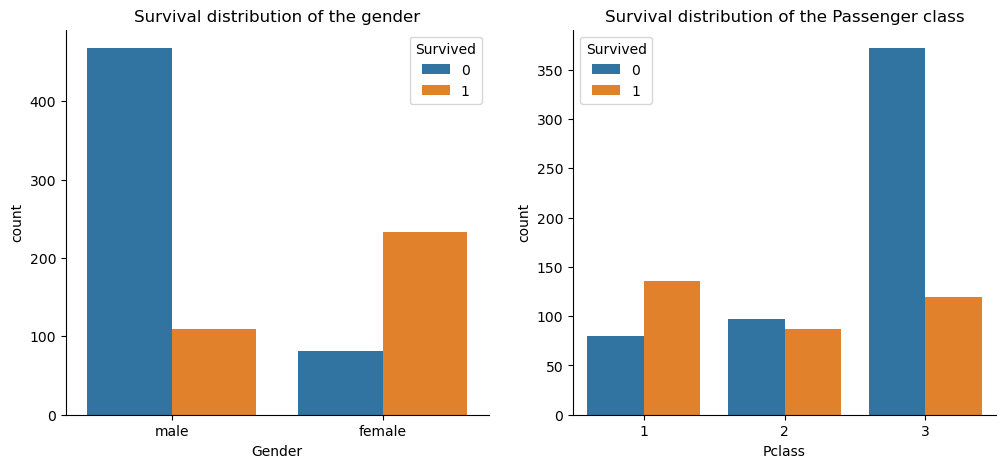

In [23]:
#plotting Sex and Survived

fig, ax = plt.subplots(1, 2, figsize=[12,5])

sns.countplot(data=df, x='Sex', hue='Survived', ax=ax[0])
sns.countplot(data=df, x='Pclass', hue='Survived', ax=ax[1])

#add title
ax[0].set_title('Survival distribution of the gender')
ax[0].set_xlabel('Gender')
ax[0].spines[['top', 'right']].set_visible(False)


#add title
ax[1].set_title('Survival distribution of the Passenger class')
ax[1].set_xlabel('Pclass')
ax[1].spines[['top', 'right']].set_visible(False)


plt.show()

- This plot shows that majority of the male passenger(about 468) did not survived while 109 male passengers survived
- 233 females survived while about 81 of them did not

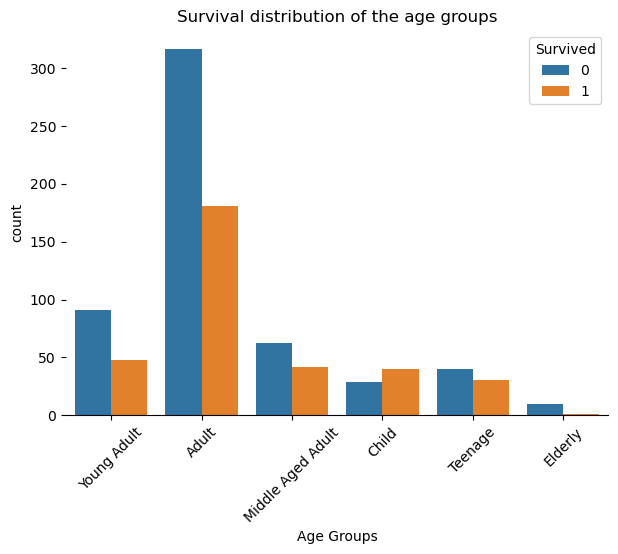

In [26]:
#plotting the distribution of Age group and Survived
fig, ax = plt.subplots(figsize=[7,5])

sns.countplot(data=df, x='Age_group', hue='Survived')


#add title
ax.set_title('Survival distribution of the age groups')
ax.set_xlabel('Age Groups')
ax.spines[['top', 'right', 'left']].set_visible(False)



#rotate the ticks
ax.xaxis.set_tick_params(rotation=45)

plt.show()


### Percentage of Age_Group that Survived

In [27]:
#filter the passengers that survived
df_survived = df.query("Survived==1").groupby(['Age_group']).agg(total=('Survived', 'count'))
df_survived

,total
Age_group,
Adult,181
Child,40
Elderly,1
Middle Aged Adult,42
Teenage,30
Young Adult,48


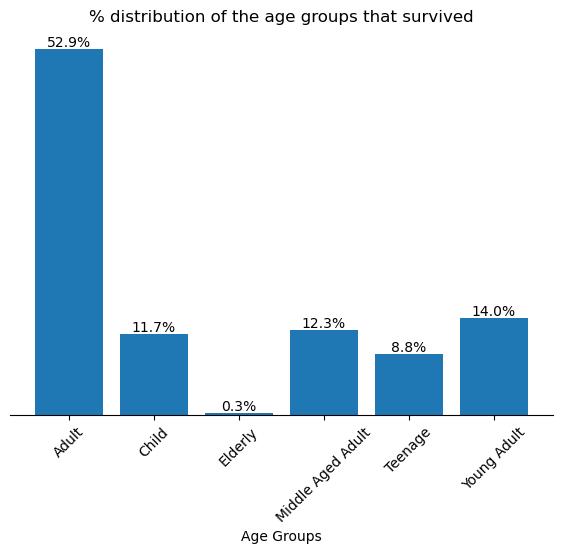

In [41]:
# Plotting the distribution of Age Group

fig, ax = plt.subplots(figsize=[7,5])
ax.bar(x=df_survived.index, height=df_survived['total'].values)

#add title
ax.set_title('% distribution of the age groups that survived')
ax.set_xlabel('Age Groups')
ax.spines[['top', 'right', 'left']].set_visible(False)


#remove yaxis
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(df_survived['total'].values):
    ax.annotate(str(round((values/df_survived['total'].sum())*100, 1))+'%', xy=(index, values+3), ha='center', va='center')


#rotate the ticks
ax.xaxis.set_tick_params(rotation=45)

plt.show()

## Data Preprocessing

In [42]:
#make a copy of the dataset
df1 = df.copy()

In [43]:
#dropping unnecessary columns
df1.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Age_group', 'Embarked'], axis=1, inplace=True)

In [44]:
#checking the dataframe
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22,1,0
1,1,1,female,38,1,0
2,1,3,female,26,0,0
3,1,1,female,35,1,0
4,0,3,male,35,0,0


### Import the libraries

In [45]:
#import the modules
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report, precision_score, f1_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.feature_selection import SelectKBest, chi2
from xgboost import XGBClassifier

### Map the Sex column to integer

In [46]:
#map the category 'Sex' to integer
df1['Sex'] = df1['Sex'].map({'female': 0, 'male': 1})

In [47]:
#display few lines
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22,1,0
1,1,1,0,38,1,0
2,1,3,0,26,0,0
3,1,1,0,35,1,0
4,0,3,1,35,0,0


### Selecting input features and target

In [48]:
#select the input features
X = df1.drop('Survived', axis=1)

In [49]:
#select the target 
y = df1['Survived']

In [50]:
#display few lines of the input features
X.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22,1,0
1,1,0,38,1,0
2,3,0,26,0,0
3,1,0,35,1,0
4,3,1,35,0,0


In [51]:
#display few lines of the target
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Split the dataset

In [52]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train.shape

(712, 5)

In [54]:
y_train.shape

(712,)

In [55]:
X_test.shape

(179, 5)

In [56]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch
331,1,1,46,0,0
733,2,1,23,0,0
382,3,1,32,0,0
704,3,1,26,1,0
813,3,0,6,4,2


### Standardizing the dataset

In [57]:
#instantiate the scaler
scaler = StandardScaler()

In [58]:
#fit_transform the X_train
X_train = scaler.fit_transform(X_train)

In [59]:
#transform the X_test
X_test = scaler.transform(X_test)

### Model Building

In [60]:
#select the models

models = {
    'LogisticRegression':{
        'model': LogisticRegression()
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier()
    },
    
    'RandomForest' : {
        'model': RandomForestClassifier()
    },
    
    'NaiveBayes': {
        'model': GaussianNB()
    },
    
    'SVM': {
        'model': SVC()
    },
    
    'KNN': {
        'model': KNN()
    },
    
    'xgboost': {
        'model': XGBClassifier()
    }
    
}

In [61]:
# create a function

def train_model(models, X_train, y_train, X_test, y_test):
    '''
        This model takes the model, x_train, y_train and X_test and return accuracy, precision and recall scores
    '''
    
    score = []
    #create a for loop
    
    for model_name, mod in models.items():
        #instantiate the model
        model = mod['model']
        
        #fit the model
        model.fit(X_train, y_train)
        
        #predict the y_test
        y_pred = model.predict(X_test)
        
        #check the accuracy of the training
        acc_score = accuracy_score(y_test, y_pred)
        prec_score = precision_score(y_test, y_pred)
        rec_score = recall_score(y_test, y_pred)
        f_score = f1_score(y_test, y_pred)
        
        score.append({
            'model_name': model_name,
            'accuracy_score': acc_score.round(2),
            'precision_score': prec_score.round(2),
            'recall_score': rec_score.round(2),
            'f1_score': f_score.round(2)
        })
    return score

In [62]:
#call the function train_model and pass the argument
train_scores = train_model(models, X_train, y_train, X_test, y_test)

In [63]:
train_data = pd.DataFrame(train_scores)
train_data

,model_name,accuracy_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.81,0.78,0.76,0.77
1,DecisionTree,0.77,0.75,0.68,0.71
2,RandomForest,0.81,0.80,0.72,0.76
3,NaiveBayes,0.76,0.70,0.74,0.72
4,SVM,0.81,0.80,0.72,0.76
5,KNN,0.79,0.76,0.72,0.74
6,xgboost,0.83,0.84,0.73,0.78


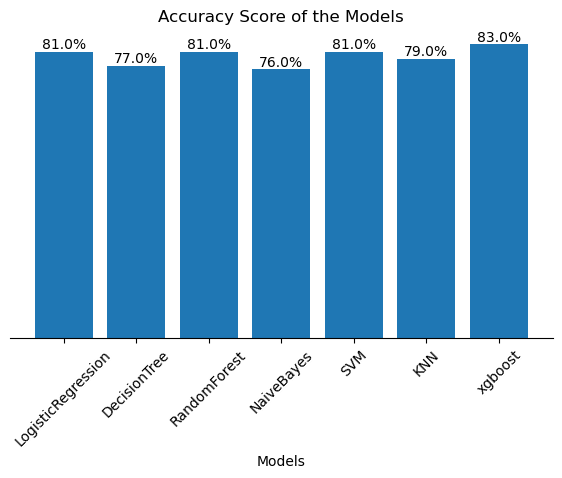

In [64]:
#plot a bar chart of the scores

fig, ax = plt.subplots(figsize=[7,4])
ax.bar( x=train_data['model_name'], height=train_data['accuracy_score'])

ax.set_title('Accuracy Score of the Models')
ax.set_xlabel('Models')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)
plt.xticks(rotation=45)
for index, values in enumerate(train_data['accuracy_score']):
    ax.annotate(str(round(values*100, 2))+'%', xy=(index, values+0.02), va='center', ha='center')
plt.show()

## Model Evaluation

In [65]:
#create a function for cross validation

def cross_val(models, X_train, y_train, k):
    '''
    this functions takes the different model and perform a five(5) fold cross validation
    '''
    #create a list for the score
    score_param = []
    
    #creae a for loop to loop through the models
    for model_name, mod in models.items():
        score_cv = cross_val_score(mod['model'], X_train, y_train, cv=k)
        score_mean = score_cv.mean()
        score_std = score_cv.std()
        
        score_param.append({
            'model_name': model_name,
            'cv_score_mean': score_mean,
            'cv_standard_deviation': score_std
        })
    return score_param

In [66]:
#calling the cross validation function
cv_scores = cross_val(models, X_train, y_train, 5)

In [67]:
#convert the cross validation scores to dataframe
cv_data = pd.DataFrame(cv_scores)
cv_data

,model_name,cv_score_mean,cv_standard_deviation
0,LogisticRegression,0.786457,0.027299
1,DecisionTree,0.787925,0.027920
2,RandomForest,0.808953,0.025947
3,NaiveBayes,0.775239,0.018291
4,SVM,0.821570,0.022926
5,KNN,0.804747,0.025089
6,xgboost,0.817404,0.012728


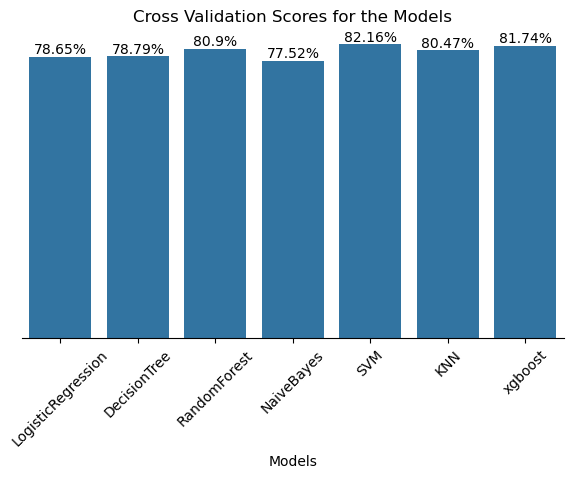

In [68]:
fig, ax = plt.subplots(figsize=[7,4])
base_color = sns.color_palette()[0]

sns.barplot(data=cv_data, x='model_name', y='cv_score_mean', color=base_color)
plt.xticks(rotation=45)

ax.set_title('Cross Validation Scores for the Models')
ax.set_xlabel('Models')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)

for index, values in enumerate(cv_data['cv_score_mean']):
    ax.annotate(str(round(values*100, 2))+'%', xy=(index, values+0.02), va='center', ha='center')
plt.show()

## Hyperparameter Tuning

In [69]:
#define the models and its parameter grids
param_models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'multi_class': ['ovr'],
            'solver': ['liblinear']
        }
    },
    
    'SVM': {
        'model': SVC(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.001, 0.01, 0.1, 1, 10],
            'gamma': [0.01, 0.1, 1, 10]
        }
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'], 
            'max_depth': np.arange(2, 10, 2),
            'max_features': ['sqrt', 'log2']
        }
    },
    
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'], 
            'max_depth': np.arange(2, 10, 2),
            'max_features': ['sqrt', 'log2'],
            'n_estimators': np.arange(20, 210, 10)
        }
    },
    
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(0, -9, num=100)
        }
    },
    
    'KNN': {
        'model':KNN(),
        'params': {
            'n_neighbors': np.arange(2, 10, 1)
        }
    },
    
    'Xgboost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': np.arange(100, 200, 20),
            'max_depth': [2,4,6],
            'learning_rate': [0.1, 0.01, 0.001]
        }
    }
}

In [70]:
# create a for loop to perform hyperparameter tunning
grid_score = []
for model_name, mp in param_models.items():
    grid_search = GridSearchCV(mp['model'], mp['params'], cv=5)
    grid_search.fit(X_train, y_train)
    grid_score.append({
        'model_name': model_name,
        'best_score': grid_search.best_score_,
        'best_parameter': grid_search.best_params_
    })

In [71]:
grid_score

[{'model_name': 'LogisticRegression',
  'best_score': 0.7864572047670639,
  'best_parameter': {'multi_class': 'ovr', 'solver': 'liblinear'}},
 {'model_name': 'SVM',
  'best_score': 0.8272037821333595,
  'best_parameter': {'C': 1, 'gamma': 1, 'kernel': 'rbf'}},
 {'model_name': 'DecisionTree',
  'best_score': 0.817393873731902,
  'best_parameter': {'criterion': 'entropy',
   'max_depth': 4,
   'max_features': 'sqrt'}},
 {'model_name': 'RandomForest',
  'best_score': 0.8328277356446371,
  'best_parameter': {'criterion': 'gini',
   'max_depth': 4,
   'max_features': 'log2',
   'n_estimators': 80}},
 {'model_name': 'NaiveBayes',
  'best_score': 0.8047375160051216,
  'best_parameter': {'var_smoothing': 0.533669923120631}},
 {'model_name': 'KNN',
  'best_score': 0.8216290751502019,
  'best_parameter': {'n_neighbors': 9}},
 {'model_name': 'Xgboost',
  'best_score': 0.8229882793263075,
  'best_parameter': {'learning_rate': 0.1,
   'max_depth': 2,
   'n_estimators': 100}}]

In [72]:
#converting the grid_scores to dataframe
gs_data = pd.DataFrame(grid_score)
gs_data.columns = ['model_name', 'best_score', 'best_parameter']
gs_data

,model_name,best_score,best_parameter
0,LogisticRegression,0.786457,"{'multi_class': 'ovr', 'solver': 'liblinear'}"
1,SVM,0.827204,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
2,DecisionTree,0.817394,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
3,RandomForest,0.832828,"{'criterion': 'gini', 'max_depth': 4, 'max_fea..."
4,NaiveBayes,0.804738,{'var_smoothing': 0.533669923120631}
5,KNN,0.821629,{'n_neighbors': 9}
6,Xgboost,0.822988,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti..."


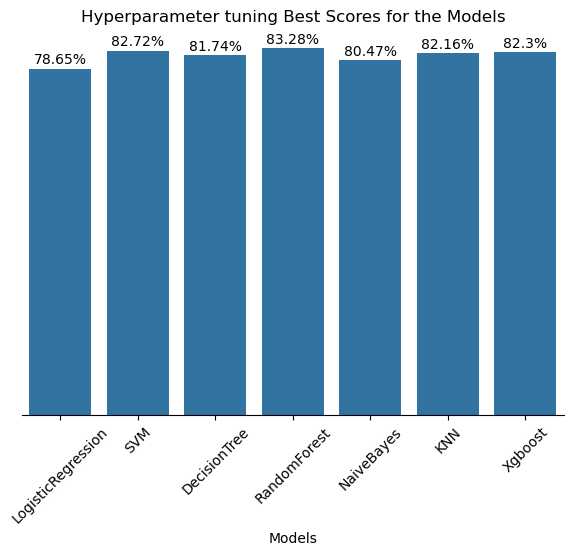

In [73]:
#plotting a barplot of the best_score

fig, ax =plt.subplots(figsize=[7,5])
base_color = sns.color_palette()[0]

sns.barplot(data=gs_data, x='model_name', y='best_score', color=base_color)
plt.xticks(rotation=45)

ax.set_title('Hyperparameter tuning Best Scores for the Models')
ax.set_xlabel('Models')
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.yaxis.set_visible(False)

for index, values in enumerate(gs_data['best_score']):
    ax.annotate(str(round(values*100, 2))+'%', xy=(index, values+0.02), va='center', ha='center')
plt.show()

- From the hyperparameter tuning, these three models **Xgboost**, **SVM**, **Random Forest Classifier** performs better with more than **80%** score

## Random Forest Classifier (with best parameter)

In [75]:
#instantiate the model with the best parameter
clf_rf = RandomForestClassifier(criterion='gini', max_depth= 4, max_features='log2', n_estimators= 80)

#fit the model
clf_rf.fit(X_train, y_train)

#predict the y_test
y_pred_rf = clf_rf.predict(X_test)

#check the accuracy score
rf_acc_score = accuracy_score(y_test, y_pred_rf)
rf_acc_score

0.8212290502793296

### Random Forest Confusion Matrix

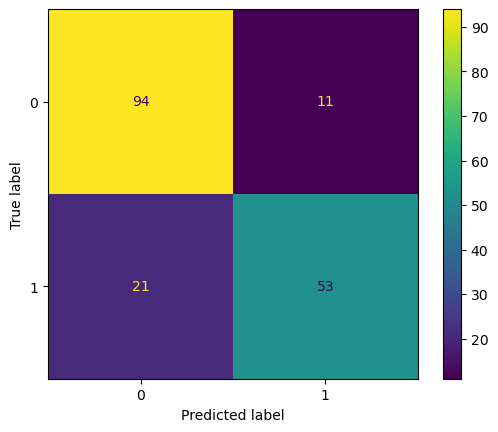

In [76]:
#display the Confusion Matrix for the classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

### ROC CURVE

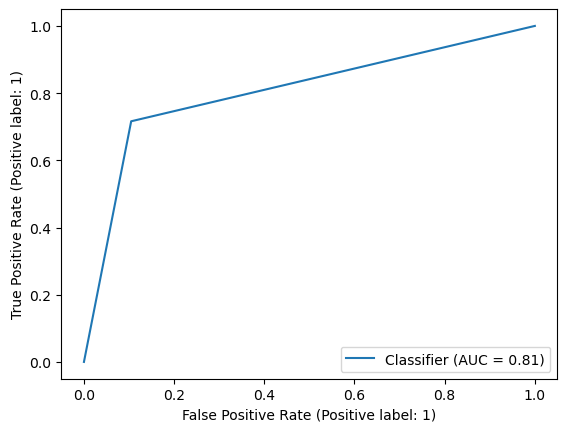

In [77]:
#plot the roc curve
RocCurveDisplay.from_predictions(y_test, y_pred_rf)

## SVM (with the best parameter)

In [78]:
#instantiate the model with the best parameter
clf_svc = SVC(C=1, gamma= 1, kernel='rbf')

#fit the model
clf_svc.fit(X_train, y_train)

#predict the y_test
y_pred_svc = clf_svc.predict(X_test)

#check the accuracy score
svc_acc_score = accuracy_score(y_test, y_pred_svc)
svc_acc_score

0.8044692737430168

### SVC Confusion Matrix

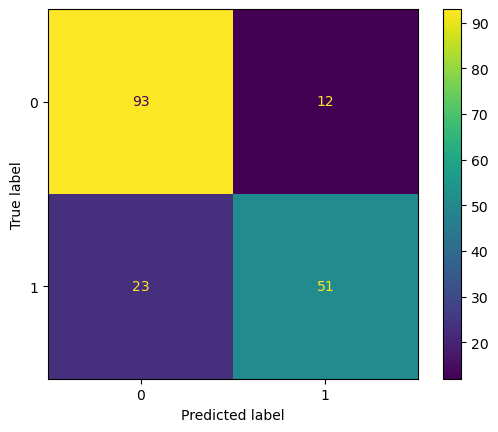

In [79]:
#display the Confusion Matrix for the classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc)

### ROC Curve

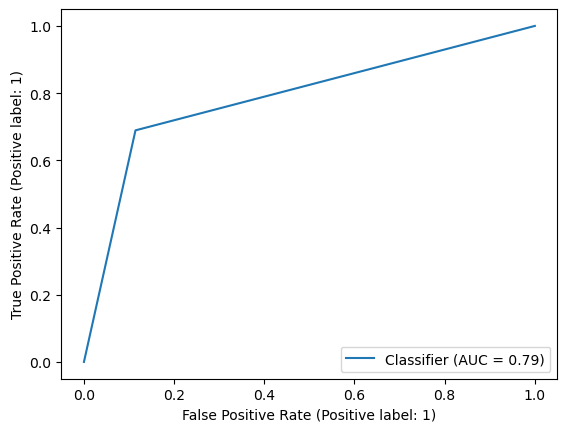

In [80]:
#plot the roc curve
RocCurveDisplay.from_predictions(y_test, y_pred_svc)

## XGBOOST (with best parameter)

In [81]:
#instantiate the model with the best parameter
clf_xg = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=100)

#fit the model
clf_xg.fit(X_train, y_train)

#predict the y_test
y_pred_xg = clf_xg.predict(X_test)

#check the accuracy score
xg_acc_score = accuracy_score(y_test, y_pred_xg)
xg_acc_score

0.8156424581005587

### XGBOOST Confusion Matrix

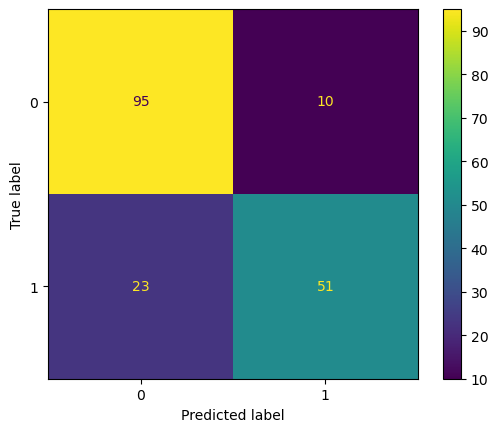

In [82]:
#display the Confusion Matrix for the classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xg)

### ROC Curve

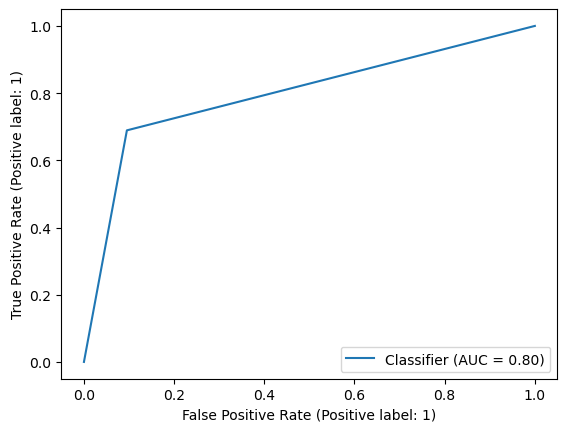

In [83]:
#plot the roc curve
RocCurveDisplay.from_predictions(y_test, y_pred_xg)

## Accuracy Score of the top three Models

In [84]:
#create a dictionary of the scores
acc_scores = {'scores': [rf_acc_score, svc_acc_score, xg_acc_score]}
 

#convert the dictionary to dataframe
top_model_scores = pd.DataFrame(acc_scores)
top_model_scores.index = ['Random Forest', 'SVC', 'XGBOOST']
top_model_scores

,scores
Random Forest,0.821229
SVC,0.804469
XGBOOST,0.815642


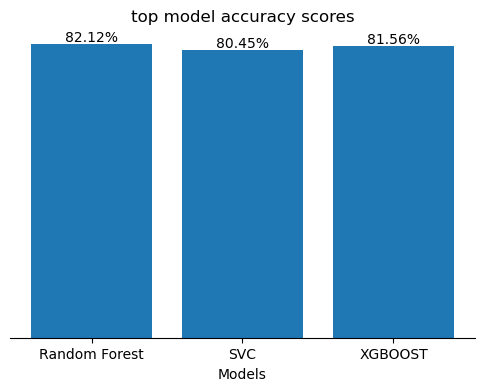

In [85]:
#plotting a bar chart
fig, ax = plt.subplots(figsize=[6,4])
ax.bar(x=top_model_scores['scores'].index, height=top_model_scores['scores'].values)

ax.set_title('top model accuracy scores')
ax.set_xlabel('Models')
ax.set_ylabel('scores')

ax.spines[['top', 'left', 'right']].set_visible(False)
ax.yaxis.set_visible(False)

for index, values in enumerate(top_model_scores['scores']):
    ax.annotate(str(round((values*100), 2))+'%', xy=(index, values+0.02), ha='center', va='center')

plt.show()

- From the bar chart, the **Random Forest Classifier** is the best model for the classification 

## Saving the Model

In [86]:
#import pickle and os
import os
import pickle
pickle.dump(clf_rf, open('model.pkl', 'wb'))

## Save the Scaler

In [87]:
#saving the standard scaler
pickle.dump(scaler, open('scaler.pickle', 'wb'))

## Load the Model

In [88]:
#load the model
model_titanic = pickle.load(open('model.pkl', 'rb'))

## Import the test_data

In [89]:
#import test data
test_data = pd.read_csv('test.csv')

In [90]:
#display the few lines of the test_data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
#checking for missing values
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [92]:
#checking for duplicates
test_data.duplicated().sum()

0

In [93]:
#drop unnecessary columns
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [94]:
#display few lines
test_data.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [95]:
#preprocessing age of test data
age_med = test_data['Age'].median()
test_data['Age'] = test_data['Age'].fillna(age_med)

#round the age and convert to integer
test_data['Age'] = test_data['Age'].round(0).astype('int')

In [96]:
#map the category 'Sex' to integer
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})

In [97]:
#display few lines
test_data.head(3)

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34,0,0
1,3,0,47,1,0
2,2,1,62,0,0


In [98]:
#creating the XX_test set
XX_test = test_data.copy()

## Standardize the XX_test data

In [99]:
#transform the XX_test data
XX_test = scaler.transform(XX_test)

## Predict the yy_test

In [100]:
#predicting the yy_test
yy_pred = model_titanic.predict(XX_test)

In [101]:
yy_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,